# Modulos

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os


In [11]:
#notebook_path = os.path.abspath("./Python/variations.xls")


# Tratamento de Dados

Criar data frame e colocar primeira coluna como sample

In [3]:
raw_data = pd.read_excel(
    "../Python/variations.xls", sheet_name="variations")
    #"./projects/covid/variations.xls", sheet_name="variations")

raw_df = pd.DataFrame(raw_data)
raw_df.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)
raw_df

,sample,REF,ALT,#
0,sample_5390,NaN,NaN,NaN
1,NaN,A,G,1.0
2,NaN,C,T,4.0
3,NaN,GGG,AAC,1.0
4,sample_5391,NaN,NaN,NaN
...,...,...,...,...
9965,NaN,GAGTTCAG,GG,1.0
9966,NaN,G,T,13.0
9967,NaN,TAA,TA,1.0
9968,NaN,T,C,3.0


preencher os valores NA da primeira coluna (sample) com os valores anteriores




In [4]:
raw_df['sample'].ffill(inplace=True)
raw_df
# test_df.tail(50)

,sample,REF,ALT,#
0,sample_5390,NaN,NaN,NaN
1,sample_5390,A,G,1.0
2,sample_5390,C,T,4.0
3,sample_5390,GGG,AAC,1.0
4,sample_5391,NaN,NaN,NaN
...,...,...,...,...
9965,sample_31308,GAGTTCAG,GG,1.0
9966,sample_31308,G,T,13.0
9967,sample_31308,TAA,TA,1.0
9968,sample_31308,T,C,3.0


Retirar valores NA das restantes colunas (Ref, Alt e #)

In [5]:
raw_df = raw_df.dropna(axis=0, how="any")
raw_df

#Como alternativa:
#data_no_na = test_df[['REF', 'ALT', '#']].apply(lambda x: pd.Series(x.dropna().values)) -> alternativa para remover os NAs


,sample,REF,ALT,#
1,sample_5390,A,G,1.0
2,sample_5390,C,T,4.0
3,sample_5390,GGG,AAC,1.0
5,sample_5391,A,G,1.0
6,sample_5391,C,T,4.0
...,...,...,...,...
9965,sample_31308,GAGTTCAG,GG,1.0
9966,sample_31308,G,T,13.0
9967,sample_31308,TAA,TA,1.0
9968,sample_31308,T,C,3.0


Usar `pivot` para colocar a coluna sample como index, as colunas REF e ALT passam para as primeiras 2 rows 

In [6]:
# final_data = raw_df.pivot(index="sample",
#                               columns=["REF", "ALT"], values=("#"))
# final_data.columns.name

final_df = (raw_df.set_index(['sample', 'REF', 'ALT'])
                ['#']
                .unstack(['REF', 'ALT'], fill_value=0)
                )
final_df

REF,A,C,GGG,C,T,G,AATGA,A,T,G,...,CTCGG,CTTAC,GCG,TTTAC,CCTG,CTG,TATGG,ATATGAGT,GTGTTTATTAC,TTCCATTTGGAAT
ALT,G,T,AAC,A,C,T,AA,T,A,A,...,GTCGT,TTTAG,TCA,TC,TCTT,ATT,TG,AT,ATGTTTAC,TT
sample,,,,,,,,,,,,,,,,,,,,,
sample_24115,4.0,16.0,0.0,1.0,3.0,11.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24116,4.0,13.0,0.0,2.0,2.0,7.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24117,4.0,14.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24118,4.0,15.0,0.0,2.0,2.0,13.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_24119,4.0,16.0,0.0,1.0,3.0,12.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_6364,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_6365,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
for column in final_df.columns[1:]:
	if sum(final_df[column]) < 10:
		final_df.drop([column], axis=1, inplace=True)

final_df

REF             A     C  GGG    C    T     G    A    T    G         T    A  \
ALT             G     T  AAC    A    C     T    T    A    A    C    G    C   
sample                                                                       
sample_24115  4.0  16.0  0.0  1.0  3.0  11.0  0.0  0.0  2.0  0.0  1.0  0.0   
sample_24116  4.0  13.0  0.0  2.0  2.0   7.0  1.0  0.0  2.0  0.0  1.0  0.0   
sample_24117  4.0  14.0  0.0  2.0  2.0   8.0  0.0  0.0  2.0  0.0  1.0  0.0   
sample_24118  4.0  15.0  0.0  2.0  2.0  13.0  0.0  0.0  2.0  0.0  1.0  0.0   
sample_24119  4.0  16.0  0.0  1.0  3.0  12.0  0.0  0.0  2.0  0.0  1.0  0.0   
...           ...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   
sample_6364   1.0   5.0  1.0  0.0  0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   
sample_6365   1.0   6.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0   
sample_6366   2.0   4.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
sample_6367   1.0   3.0  1.0  1.0  2.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   
sample_6368   1.0   4.0  1.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

REF          CTGC    C AGATTTCA GAGTTCAG  TAA  GCT  CAG  
ALT          TTGT    G       AA       GG   TA  TCC  TAT  
sample                                                   
sample_24115  0.0  2.0      1.0      1.0  1.0  0.0  0.0  
sample_24116  0.0  2.0      1.0      1.0  1.0  0.0  0.0  
sample_24117  0.0  2.0      1.0      1.0  1.0  0.0  0.0  
sample_24118  0.0  2.0      1.0      1.0  1.0  0.0  0.0  
sample_24119  0.0  2.0      1.0      1.0  1.0  0.0  0.0  
...           ...  ...      ...      ...  ...  ...  ...  
sample_6364   0.0  0.0      0.0      0.0  0.0  0.0  0.0  
sample_6365   0.0  0.0      0.0      0.0  0.0  0.0  0.0  
sample_6366   0.0  0.0      0.0      0.0  0.0  0.0  0.0  
sample_6367   0.0  0.0      0.0      0.0  0.0  0.0  0.0  
sample_6368   0.0  0.0      0.0      0.0  0.0  0.0  0.0  

[1226 rows x 19 columns]

Guardar em excel



In [31]:
final_df.to_excel('final_df_new.xlsx')

# PCA analysis


* Centrar e fazer scaling aos dados
NOTA: Se as nossas amostras estivessem nas colunas, colocar `preprocessing.scale(final_data_2.T)` para fazer a transposiçao

In [32]:
scaled_data = preprocessing.scale(final_df)
# Como alternativa podemos usar o seguinte código para centrar os dados:
# StandardScaler().fit_transform(final_data_2)

pca = PCA()
pca.fit(scaled_data)  # calcular loading scores e variaçao para cada PCA
pca_data = pca.transform(scaled_data)
pca_data

array([[ 3.31179534e+00, -5.31207434e-01,  3.59378850e-01, ...,
         2.09932608e-03,  2.17555902e-02,  1.13578584e-02],
       [ 3.16574688e+00, -4.39451742e-01, -1.73699218e+00, ...,
         2.83283796e-02,  7.50213702e-02, -8.69744688e-03],
       [ 3.10510757e+00, -5.43458026e-01,  2.15355471e-01, ...,
        -2.46099982e-02,  6.44337695e-02,  6.24792518e-03],
       ...,
       [-2.73820545e+00, -5.88004724e-02,  2.92405180e-01, ...,
        -1.82862546e-02,  9.14988193e-04,  2.80915190e-02],
       [-2.42293324e+00, -2.60377952e-01, -2.34156217e+00, ...,
         4.45090200e-01, -3.59065825e-02, -6.54618038e-02],
       [-3.30312631e+00, -2.11989904e-01, -4.19341152e-01, ...,
        -1.13763454e-01,  7.89425340e-03, -6.66660331e-03]])

### Scree plot para ver quantas componentes devem estar presentes no plot final. Este plot é usado para determinar o numero de fatores/principal components para uma analise de PCA.

* Calcular % de variabilidade que cada PC tem

In [33]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var


array([53.6,  6.2,  6. ,  5.5,  5.4,  5.1,  4.5,  4.1,  3.5,  1.6,  1.1,
        0.9,  0.7,  0.5,  0.5,  0.4,  0.3,  0.1,  0.1])

* Criar labels para cada PC (PC1, PC2, PC3...) tendo em conta o tamanho da variabilidade

In [35]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
labels


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19']

* Fazer plot do spree plot

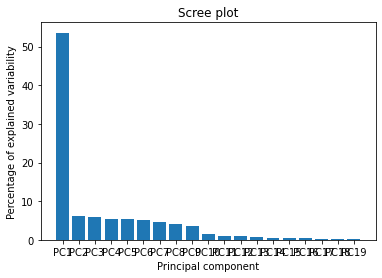

In [36]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variability')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()  # grande parte da variabilidade está presente nos primeiros 9 componentes (cut-off point de 2). Estes 9 PC podem fazer uma boa representaçao geral dos dados

5. Colocar as principais coordenadas (9) numa data frame onde os rows são os samples e as colunas tem a PC label


In [37]:

#Guardar as labels das amostras numa variavel unica de modo a colocar como indice na data frame dos PCs
sample_labels = final_df.index

pca_df = pd.DataFrame(pca_data, index=[sample_labels], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
sample,,,,,,,,,,,,,,,,,,,
sample_24115,3.311795,-0.531207,0.359379,-0.122753,0.029198,-0.384698,-0.617923,0.112970,0.029597,-0.529050,0.443285,-0.492514,0.129499,0.325184,0.326731,-0.002843,0.002099,0.021756,0.011358
sample_24116,3.165747,-0.439452,-1.736992,1.001381,0.902596,-0.029640,1.003494,1.236681,-0.511747,0.292088,-0.176086,-0.253361,-0.440004,0.030459,-0.272812,0.186409,0.028328,0.075021,-0.008697
sample_24117,3.105108,-0.543458,0.215355,0.065339,-0.002028,-0.410354,-0.513835,0.143836,0.149277,0.568729,-0.182760,-0.328091,-0.488891,0.256071,-0.264814,0.202907,-0.024610,0.064434,0.006248
sample_24118,3.494759,-0.561980,0.246144,0.078050,-0.012894,-0.492882,-0.594277,0.113464,0.136576,0.468749,-0.190460,-0.237183,-0.270473,0.827808,0.535965,0.230285,0.329716,0.002961,-0.010551
sample_24119,3.380050,-0.534519,0.364563,-0.120659,0.026731,-0.400577,-0.633201,0.107251,0.024545,-0.552171,0.438051,-0.479033,0.172618,0.440208,0.476741,0.024321,0.090426,0.010396,0.008745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_6364,-3.077477,-0.115226,-2.356765,0.585407,0.692299,0.443539,1.378247,1.177568,0.437762,-0.310149,-0.046844,0.061924,0.090274,-0.054659,0.250923,-0.253617,-0.147116,-0.002225,-0.031692
sample_6365,-2.731334,-0.084673,0.313831,-0.040082,-0.036786,-0.182807,-0.178753,-0.170765,-1.000283,0.192658,-0.031148,-0.007123,-0.071089,0.051314,0.119961,-0.255402,-0.225482,0.013814,0.006418
sample_6366,-2.738205,-0.058800,0.292405,-0.066887,-0.045490,-0.170930,-0.180213,-0.149595,-0.980115,0.330982,-0.161192,-0.096036,0.153708,-0.422427,-0.059957,-0.036721,-0.018286,0.000915,0.028092


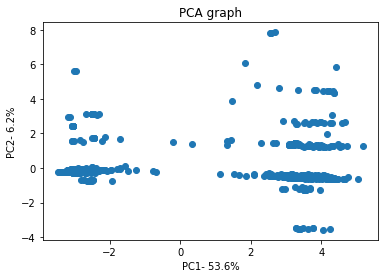

In [38]:


plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()
